In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


Matplotlib is building the font cache; this may take a moment.


In [2]:
diabetes = load_diabetes()
X = diabetes.data


In [3]:
import pandas as pd
df = pd.DataFrame(data=X, columns=diabetes.feature_names)

In [4]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Choose the Number of Clusters (K):
Decide on the number of clusters (K) you want to create. You can use techniques like the elbow method or silhouette score to help determine an appropriate value for K.

c:\Users\khush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\khush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\khush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\khush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

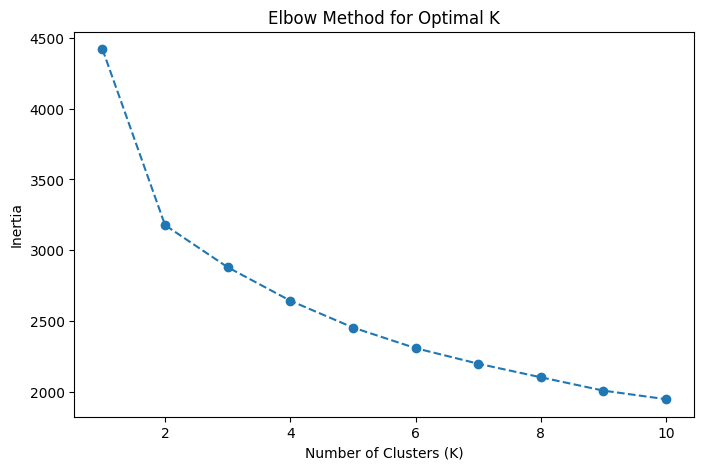

In [6]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


<!-- Explanation of the above code -->
In unsupervised learning, K-Means clustering is a common technique used to group data points into clusters based on their similarity. The idea is to find K centroids (representative points) that minimize the sum of squared distances between data points and their assigned centroids. The sum of squared distances is called "inertia."

### Steps - Explanation line by line

inertia = []: Initializes an empty list called inertia to store the inertia values for different values of k.

for k in range(1, 11): Iterates through a range of values for k from 1 to 10. k represents the number of clusters you want to find in your data.

kmeans = KMeans(n_clusters=k, random_state=42): Creates a K-Means clustering model with the current value of k. The n_clusters parameter specifies the number of clusters, and random_state is set to ensure reproducibility.

kmeans.fit(X_scaled): Fits the K-Means model to the scaled data X_scaled. This step performs the clustering by finding k centroids and assigning data points to the nearest centroid.

inertia.append(kmeans.inertia_): Calculates the inertia for the current k and appends it to the inertia list. The inertia is a measure of how tightly the data points are grouped around their respective centroids. It is calculated as the sum of squared distances from each data point to its assigned centroid.


In [7]:
optimal_k = 3  # Replace with the selected K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)


c:\Users\khush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [8]:
labels = kmeans.labels_


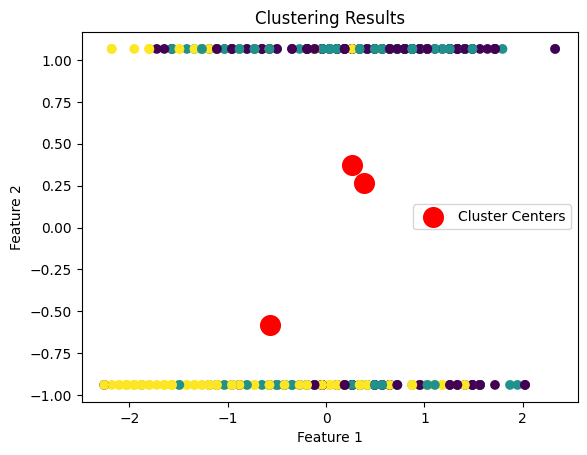

In [9]:
# For simplicity, we'll visualize the first two features (you can choose other features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Results')
plt.legend()
plt.show()


In [ ]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)